In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


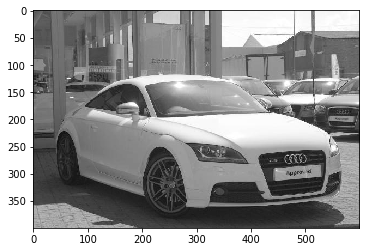

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/Bolsista/Documents/Dan/ProjetoIA/bikesAndCars"

CATEGORIES = ["Cars", "Bikes"]

for category in CATEGORIES:  # do Cars and Bikes
    path = os.path.join(DATADIR,category)  # create path to cars and bikes
    for img in os.listdir(path):  # iterate over each image per cars and bikes
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [19]:
print ( img_array )


[[114 111 106 ... 254 255 255]
 [102 106 109 ... 254 255 255]
 [ 94  99 105 ... 253 254 255]
 ...
 [179 180 178 ...  66  68  70]
 [139 144 151 ...  67  69  70]
 [168 171 173 ...  65  67  68]]


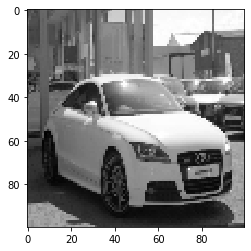

In [20]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

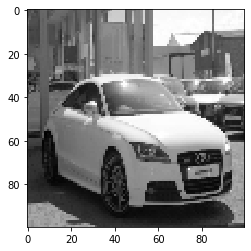

In [21]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()



# reservar algumas imagens para o teste final

criando manualmente um diretório chamado Testinge, em seguida, criar 2 diretórios dentro dele, um para Doge outro para Cat. A partir daqui, vou apenas mover as 15 primeiras imagens de ambas Doge Catpara as versões de treinamento. Mova-os, não copie. Usaremos isso para nossos testes finais.

# embaralhar os dados

No momento, nossos dados são apenas todos os cães, depois todos os gatos. Isso geralmente acabará causando problemas também, pois, inicialmente, o classificador aprenderá a prever sempre os cães. Então ele mudará para oh, apenas preveja todos os gatos! Indo e voltando assim também não é bom.

In [23]:
import random

random.shuffle(training_data)

Nossa training_dataé uma lista, o que significa que é mutável, por isso agora está bem embaralhada. Podemos confirmar isso repetindo algumas das amostras iniciais e imprimindo a classe.

In [24]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
1
0


Ótimo, nós temos as aulas bem misturadas! Hora de fazer o nosso modelo!



In [25]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[128]
   [130]
   [135]
   ...
   [208]
   [208]
   [210]]

  [[132]
   [133]
   [127]
   ...
   [209]
   [210]
   [211]]

  [[131]
   [126]
   [126]
   ...
   [212]
   [212]
   [213]]

  ...

  [[ 35]
   [ 42]
   [ 41]
   ...
   [ 59]
   [ 87]
   [ 78]]

  [[ 34]
   [ 30]
   [ 52]
   ...
   [ 79]
   [ 64]
   [ 61]]

  [[ 65]
   [ 92]
   [ 93]
   ...
   [ 77]
   [ 75]
   [ 74]]]]


Vamos salvar esses dados, para que não precisemos continuar calculando-os sempre que quisermos brincar com o modelo de rede neural:



In [26]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Sempre podemos carregá-lo em nosso script atual, ou um totalmente novo, fazendo:



Agora que obtivemos o conjunto de dados, estamos prontos para cobrir redes neurais convolucionais e implementar uma com nossos dados para classificação.

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [30]:
import pickle

pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
b = pickle.load(pickle_in)
y = np.array(b)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('hard_sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 4333 samples, validate on 1858 samples
Epoch 1/3
4333/4333 [==============================] - 65s 15ms/sample - loss: 0.8700 - acc: 0.9430 - val_loss: 0.9879 - val_acc: 0.9360
Epoch 2/3
4333/4333 [==============================] - 64s 15ms/sample - loss: 0.8757 - acc: 0.9432 - val_loss: 0.9879 - val_acc: 0.9360
Epoch 3/3
4333/4333 [==============================] - 65s 15ms/sample - loss: 0.8757 - acc: 0.9432 - val_loss: 0.9879 - val_acc: 0.9360


CATEGORIES = ["Cars","Bikes"]


def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)



prediction = model.predict([prepare('C:/Users/Bolsista/Documents/Dan/ProjetoIA/TestCar/test2.jpg')])
print(prediction[0][0])  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

In [35]:
CATEGORIES = ["Cars","Bikes"]

def prepare(filepath): 
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) 
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict([prepare('C:/Users/Bolsista/Documents/Dan/ProjetoIA/TestCar/05770.jpg')]) 
print(prediction[0][0]) # will be a list in a list. 
print(CATEGORIES[int(prediction[0][0])])

0.0
Cars
